## Outline
- Метрики: энтропия, прирост информации и Gini impurity
- Валидация (отложенная и кросс-валидация)
- Дерево (DT) лучше, когда яврко вырожены критерии отбора (точки ветвления) (напр, выплата кредита)
- kNN лучше, когда объекты классифицируются по общиму признаку (напр, MNIST)


[ODS, Лекция 3](https://habr.com/en/company/ods/blog/322534/)

Things to look at: 
- sklearn.model_selection.GridSearchCV()
- sklearn.pipeline.Pipeline()
- cross_val_score()

## Theory
- Основные задачи машинного обучения
- Энтропия и Прирост информации
- Decision Trees


**Machin learning** - говорят, что компьютерная программа обучается при решении какой-то задачи из класса T, если ее производительность, согласно метрике P, улучшается при накоплении опыта E.

Среди самых популярных задач **T** в машинном обучении:  
- кластеризация – разбиение множества объектов на группы на основании признаков этих объектов так, чтобы внутри групп объекты были похожи между собой, а вне одной группы – менее похожи
- классификация – отнесение объекта к одной из категорий на основании его признаков
- детекция аномалий – поиск объектов, "сильно непохожих" на все остальные в выборке либо на какую-то группу объектов
- регрессия – прогнозирование количественного признака объекта на основании прочих его признаков

**Энтропия** - мера хаоса  
Энтропия Шеннона определяется для системы с **N** возможными состояниями следующим образом:  


$\large{S = - \sum_{i=1}^{N} p_i log_2(p_i)} $  


где $p_i$ - вероятность нахождения системы в состоянии *i*

Разбиение на группы данных (на основе дерева решенией) помогает уменьшить энтропию. При разделении сета, уменькашется энтропия ( = хаос) $\implies$ растете **Прирост информации (IG = Information gain)** - это мера уменьшения хаоса (энтропии). Так при разделении сета, **IG**:  


$ \large{IG(Q) = S_0 - \sum_{i=1}^{q} \frac{N_i}{N} S_i}$  


где Q - признак, $q$ - кол-во разбиений сета, $N_I$- число элементов выборки, у которых Q признак имеет $i$-ое значение.

### Выбор параметров модели и кросс-валидация
- отложенная выборка (held-out/hold-out set)
- кросс-валидация (cross-validation)

Чтобы проверить качество построенной модели используется валидация: прогоняется тестовая выборка, и оценивается качество (например, кол-во правильно классифицированных объектов) для данной модели (т.е. метода, метрики, глубины, кол-ва признаков, кол-ва соседей и т.д.)   
Чаще всего это делается одним из 2 способов:

- **отложенная выборка (held-out/hold-out set)**. При таком подходе мы оставляем какую-то долю обучающей выборки (как правило от 20% до 40%), обучаем модель на остальных данных (60-80% исходной выборки) и считаем некоторую метрику качества модели (например, самое простое – долю правильных ответов в задаче классификации) на отложенной выборке.   
- **кросс-валидация** (cross-validation, на русский еще переводят как скользящий или перекрестный контроль). Тут самый частый случай – K-fold кросс-валидация  
![cross-validation](https://habrastorage.org/files/b1d/706/e6c/b1d706e6c9df49c297b6152878a2d03f.png)

## Деревья решения (Decision Trees, DT)
- Это посути последовательное ветвление на основе определенных признаков. 
- На каждом новом шаге ветвления, проверяются все возможные варианты и выбирается тот, что приносит максимальный прирост информации (**IG**). Замет на следующем шаге этот процесс повторяется (рекурсия). Это принцип **жадной максимизации прироста информации**.
- Лист (**leaf**) - точка ветвления
- Главные алгоритмы деревьев решений: ID3 и C4.5

**Метрики для decision trees**:
- Энтропия: $S = - \sum_{i=1}^{N} p_i log_2(p_i)$
- Неопределенность Джини (Gini impurity): $G = 1 - \sum\limits_k (p_k)^2$
- Ошибка классификации (misclassification error): $E = 1 - \max\limits_k p_k$

Энетромия и Gini impurity дают приблизительно одинковые результаты, их обычно и используют. Ошибка классификации - хуже.

#### **Пример** 

[отсюда, habr](https://habr.com/en/post/171759/)  
Будем предсказывать цвет шарика по его координате.
![Balls problem](https://hsto.org/storage2/173/96f/27f/17396f27f81e9bb312f2f01aa1254dbe.png)

Так перед делением:   
Вероятность вытянуть желтый: $p_2=\frac{11}{20}$ и синий: $p_2=\frac{9}{20}$   
тогда энтропия для этого случая:  

$S_0 = -\frac{9}{20}\log_2{\frac{9}{20}}-\frac{11}{20}\log_2{\frac{11}{20}} \approx 1$  


После деления по признаку Q ( $x \leq 12$), энтропии для отдельных случаев будут:    

$S_1 = -\frac{5}{13}\log_2{\frac{5}{13}}-\frac{8}{13}\log_2{\frac{8}{13}} \approx 0.96$   
$S_2 = -\frac{1}{7}\log_2{\frac{1}{7}}-\frac{6}{7}\log_2{\frac{6}{7}} \approx 0.6$  

А IG:  

$ IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16$   

Те разделение ведет к увеличению порядка. Так и будем делить пока не поделем на группы, где будут шары одного цвета.  Тогда энтропия для такой группы будет: $S = \log_2{1} = 0$ т.к. вероятность вытянуть шар определенного цвета будет 1.  

___

В примере все работает прекрасно, но это был подгон признаков ветвления под обучающих сет. В случаи нового набора данных, эти признаки (последовательное деление в тех же точках) не сработают $ \implies $ **переобучение**.

### Реализация на Scikit-learn 

**Numpy** few notes:
1. When you say array[:, 0], you're saying give me the 0th index of all the rows in array (this is another way of saying give me the 0th column).


2. When you say array[:2] - it gives indexeds [0, 1], 2 is not inclusive

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

#### Задача классификации

**Генерируем рандомный сет**

In [2]:
# первый класс
# np.random.normal(loc = 0, scale = 1, size = ()) - default loc = 0 - это где лежит среднее значение распределения
np.seed = 7  #ставим зерно для рандомизации
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)                  #матрица 100x1 с нулями

# добавляем второй класс
# у второго распределения все тоже самое, но смещено среднее значение распр. : loc = 2
# np.r_ - it does is row-wise merging. Тут присоединяет вторую матрицу в конец (есть аргументы гда присоединение сложнее)
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

`train_data = np.random.normal(size=(100, 2))` - троим 2D матрицу (100x2) с случайным заполнением из норм. распределения. 2D чтобы: `train_data[:, 0]` - X axis, `train_data[:, 1]` - Y axis  
`np.r_[array1, array2] `- . Тут присоединяет вторую матрицу в конец (есть аргументы, чтобы присоединение делалось по-другому)  
`train_data[:, 0]` - берет первый столбец (колонка[0])

**График сета**

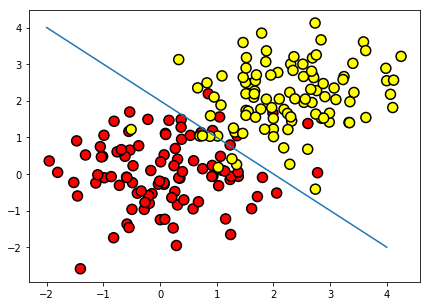

In [3]:
# c=train_labels - это матрица 200x1: первые 100 значений - 0, вторые - 1. Красным красит первые 100 зн
plt.rcParams['figure.figsize'] = (7,5)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

plt.plot(range(-2,5), range(4,-3,-1));

`train_data[:, 0]` - X axis  
`train_data[:, 1]` - Y axis  
`c=train_labels` - это матрица 200x1: первые 100 значений - 0, вторые - 1. Красным красит первые 100 значений, желтым последник 100   
Диагональ строится автоматически   
`s = 100` - s : scalar or array_like, shape (n, ). The marker size in points $^{**}2$. Default is rcParams['lines.markersize'] ** 2.


**Учим дерево**  
Будем использовать параметр max_depth, ограничивающий глубину дерева.

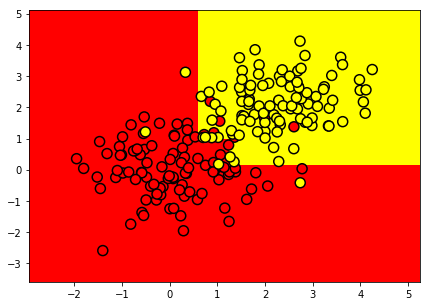

In [4]:
#Целиком мы sklearn не импортируем, тк он оч большой
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1   
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1   
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted,  cmap='autumn')     
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

#### class DecisionTreeClassifier 
- [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

Создаем класс `DecisionTreeClassifier` с соответвующими атрибутами   
`clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)`   


**Atributes**   

- **criterion**  
    Вид метрики, которая будет использована   


- **max_depth**   
    Насколько глубоко делать ветвление. Если слишком глубоко ветвить, то на обучающей выборке алгоритм подберет все идеально, но на тесте будет плохо $\implies$ *переобучение*.  

- **random_state**  
     Basiclly, manually set the seed for randomisation in tree learning   
     This is explained in the documentation
    ```
    The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms (Эвристический алгоритм) such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
    ```

    So, basically, a sub-optimal greedy algorithm is repeated a number of times using random selections of features and samples (a similar technique used in random forests). The random_state parameter allows controlling these random choices.

    The interface documentation specifically states:

    ```
    If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
    ```

    So, the random algorithm will be used in any case. Passing any value (whether a specific int, e.g., 0, or a RandomState instance), will not change that. The only rationale for passing in an int value (0 or otherwise) is to make the outcome consistent across calls: if you call this with random_state=0 (or any other value), then each and every time, you'll get the same result.

----

- **max_features** — максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)


- **min_samples_leaf** – минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов


**Methods**


`fit(X, y, sample_weight=None, check_input=True, X_idx_sorted=None)`   

- $X$ - The training input samples. Internally, it will be converted to $dtype=np.float32$   
- $y$ - The target values (real numbers). Use $dtype=np.float64$ and $order='C'$  


`clf_tree.fit(train_data, train_labels)`   

 Тут признак: значения точек на плоскости  
Целевой признак/класс:  0(красн) и 1(желт)  


Реализация такова: по численному признаку (в нашем лучаии значение точек из друх распеределений: 0(красн) и 1(желт)), пытаемся предсказать при каких значениях признака, менятся целевой класс. На каждом новом делении модель случайно выбирает, как поделить ветвь -> считает энтропию. Так делается несколько раз, каждый раз деление задается случайно (для этого можно указать seed). В итоге, алгоритм выдаст лучший вариант (из всех случайных делений) по выбранной метрике/критерию.  

---  


`predict(X, check_input=True)` - Predict class or regression value for X.  
For a classification model, the predicted class for each sample in X is returned. For a regression model, the predicted value based on X is returned.

`predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)` - делает предсказание по сетке точек из meshgrid (см. ниже)  


---

#### Всопмогателный код

`def get_grid(data):` - функция, которая берет матрицу данных, находит ее граничные значения. Возвращает равномерную 2D сетку точек в пределах этих границ. Подробнее смотри [Тут: очень хорошо про meshgrid](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)   


`xx.ravel()` - It is equivalent to `reshape(-1, order=order)`. Присоединяет все столбцы, начиная со 2го, в конец первого   

` numpy.reshape(a, newshape, order='C')`   
- $a$ - Array to be reshaped (или, если вызыватеся как метод, то это будет array на котором reshape вызван.   
- $newshape$ - int or tuple of ints. $(rows, columns)$  The new shape should be compatible with the original shape. If an integer, then the result will be a 1-D array of that length. One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.   

`np.c_[xx.ravel(), yy.ravel()]` - ставит столбцы (872331,1) каждый, бок о бок. Получаем матрицу  (872331, 2), где [:, 0] - xx.ravel(), [:, 1] - yy.ravel()   


In [43]:
print(xx.shape)
print('\nravel: \n', xx.ravel().shape)
print('\nnp.c_: \n', np.c_[xx.ravel(), yy.ravel()].shape)

(929, 939)

ravel: 
 (872331,)

np.c_: 
 (872331, 2)


**пояснение к** `(np.c_[xx.ravel(), yy.ravel()])`  
По сути, xx (3,3) возвращается в формате $xx = [[1,2,3], [1,2,3],[1,2,3]]$, а соответствующая ему $yy(3,3) = [[7,7,7], [6,6,6], [9,9,9]]$. При вызове xx, yy - будет браться $1row_x = [1,2,3]$ и $1row_y = [7,7,7]$, так создасться линия на сетке соответствующая y=7 и x=range(1,3).   
Поэтому $xx.ravel() = [1,2,3, 1,2,3, 1,2,3]$ (только это стобец, а не строка). $yy.ravel() = [7,7,7, 6,6,6, 9,9,9]$ (тоже столбец). При вызове `np.c_[xx.ravel(), yy.ravel()]` = $[[1, 7], [2, 7], [3, 7], [1,6], [2,6], [3,6]$, и тд для 9] т.е. 2 стобца: x (идет 1,2,3 и снова повторяется 1, 2, 3) и y (идет 7, 7, 7 а потом переходит на 6, 6, 6 и тд). Таким образом, передавая функции `np.c_[xx.ravel(), yy.ravel()]` мы передаем сетку так же заданную сетку, как и $xx, yy$ (формат матрицами (n, m) и (n,m)), но в формате 2х стобцов:  - каждый стобец (n*m, 1).

In [34]:
#Целиком мы sklearn не импортируем, тк он оч большой
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1   
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1   
    return np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
print('xx: ', xx.shape, '\n',xx, '\n_________________________________________________\n')
print('yy: ', yy.shape, '\n',yy, '\n_________________________________________________\n')
print('ravel xx: ',xx.ravel().shape ,'\n',xx.ravel(), '\n_________________________________________________\n')
print('ravel yy: ',yy.ravel().shape ,'\n',yy.ravel(), '\n_________________________________________________\n')
print('np.c_: ', np.c_[xx.ravel(), yy.ravel()].shape ,'\n', np.c_[xx.ravel(), yy.ravel()] , '\n_________________________________________________\n')


xx:  (18, 17) 
 [[-2.9553779 -2.4553779 -1.9553779 -1.4553779 -0.9553779 -0.4553779
   0.0446221  0.5446221  1.0446221  1.5446221  2.0446221  2.5446221
   3.0446221  3.5446221  4.0446221  4.5446221  5.0446221]
 [-2.9553779 -2.4553779 -1.9553779 -1.4553779 -0.9553779 -0.4553779
   0.0446221  0.5446221  1.0446221  1.5446221  2.0446221  2.5446221
   3.0446221  3.5446221  4.0446221  4.5446221  5.0446221]
 [-2.9553779 -2.4553779 -1.9553779 -1.4553779 -0.9553779 -0.4553779
   0.0446221  0.5446221  1.0446221  1.5446221  2.0446221  2.5446221
   3.0446221  3.5446221  4.0446221  4.5446221  5.0446221]
 [-2.9553779 -2.4553779 -1.9553779 -1.4553779 -0.9553779 -0.4553779
   0.0446221  0.5446221  1.0446221  1.5446221  2.0446221  2.5446221
   3.0446221  3.5446221  4.0446221  4.5446221  5.0446221]
 [-2.9553779 -2.4553779 -1.9553779 -1.4553779 -0.9553779 -0.4553779
   0.0446221  0.5446221  1.0446221  1.5446221  2.0446221  2.5446221
   3.0446221  3.5446221  4.0446221  4.5446221  5.0446221]
 [-2.9553779 -

`predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)`   
- `predict` - делает предсказание для матрицы вида $(n, 2)$, где [:, 0] - значение точки по X, [:, 1] -  значения точки по Y. Возвращает матрицу вида $(n, 1)$ - где предссказания для каждой точки  
- `.reshape(xx.shape)` - возвращает полученой матрице вид такой же как и xx   
- *predicted* - матрица с 0 и 1, по ней будем красить плоскость предсказанием  

In [47]:
print(clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]))
print(clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).shape, '\n\n')
print(clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape))
print(clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape).shape)

[0. 0. 0. ... 1. 1. 1.]
(872331,) 


[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
(929, 939)


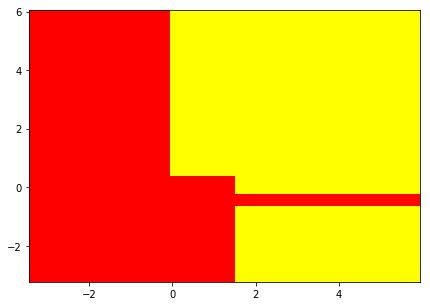

In [30]:
plt.pcolormesh(xx, yy, predicted,  cmap='autumn')     

`plt.pcolor([X, Y,] C, **kwargs)`   
- $C$ - A scalar 2-D array. The values will be color-mapped.
- $[X, Y,]$ - The coordinates of the quadrilateral (четырехсторонний) corners. The quadrilateral for C[i,j] has corners at:
- $^{**}kwargs$ - other display options

In [5]:
from sklearn.tree import export_graphviz
export_graphviz(clf_tree, feature_names=['x1', 'x2'], 
out_file= r'..\small_tree.dot', filled=True)
# для этого понадобится библиотека pydot (pip install pydot)
!dot -Tpng '..\small_tree.dot' -o '..\small_tree.png'

'dot' is not recognized as an internal or external command,
operable program or batch file.


В чем тут проблема хз. Скорее всего из за пробелов в имени vlad is love   
Вывести должно было это:  
![Tree](https://hsto.org/files/bf1/1fe/490/bf11fe49088f428996a27b0d2d2a6592.png)

#### Вывод
См. подробнее в части "Как дерево решений работает с количественными признаками".

*Количественный признак сортируется по возрастанию, и в дереве проверяются только те пороги, при которых целевой признак меняет значение (например, с 0 на 1)*.   

"Когда в данных много количественных признаков, и у каждого много уникальных значений, могут отбираться не все пороги, описанные выше, а только топ-N, дающих максимальный прирост все критерия отбора. *То есть, по сути, для каждого порога строится дерево глубины 1, считается насколько снизилась энтропия (или неопределенность Джини) и выбираются только лучшие пороги, с которыми стоит сравнивать количественный признак.*"

Пример вызова для нескольких признаков: возраст и зарплата. Целевой признак: кредит (подробнее в лекции)      
```
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[['Возраст', 'Зарплата']].values, data2['Невозврат кредита'].values);
``` 

Дерево строят до максимальной глубины только в случаи, если это:   

- Случайный лес (композиция многих деревьев) усредняет ответы деревьев, построенных до максимальной глубины (почему стоит делать именно так, разберемся позже)
- Стрижка дерева (pruning). При таком подходе дерево сначала строится до максимальной глубины, потом постепенно, снизу вверх, некоторые вершины дерева убираются за счет сравнения по качеству дерева с данным разбиением и без него (сравнение проводится с помощью кросс-валидации, о которой чуть ниже). Подробнее можно почитать в материалах репозитория Евгения Соколова.


#### Задача регрессии

В задаче регрессии(предсказание колличественного признака) дерево строится так же, только в качестве метрики используется дисперсия среднего значения:   

$\large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \overline{y_i} )^2$    

где $\overline{y_i} = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} y_i$ - среднее значение целевого признака.  

Ветвление будет так же происходить с условиями на features и в тех местах, где дисперсия будет меньше.  

---

Сгенерируем точки по функции $f(x) = e^{-x ^ 2} + 1.5 e^{-(x - 2) ^ 2}$ с некоторым шумом   

In [2]:
n_train = 150        
n_test = 1000       
noise = 0.1

#просто задаем функцию, чтобы потом графон по ней построить
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

#функция генерации train и test cетов
def generate(n_samples, noise):
    #генерируем x axis и "выпрямляем" матрицу
    X = np.random.rand(n_samples) * 10 - 5    #так получим рандомные x от -5 до 5
    X = np.sort(X).ravel()                    #зачем ее "выпрямлять", если она и так в виде (n, 1), и станет (n, 1)?
    
    #по сгенеренным х стром фунцию и прибавляпем ей шума, сгенеренного норм распределением
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)   
    X = X.reshape((n_samples, 1))             #и опять зачем "выпрямляем"? 
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [3]:
#регрессируем
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

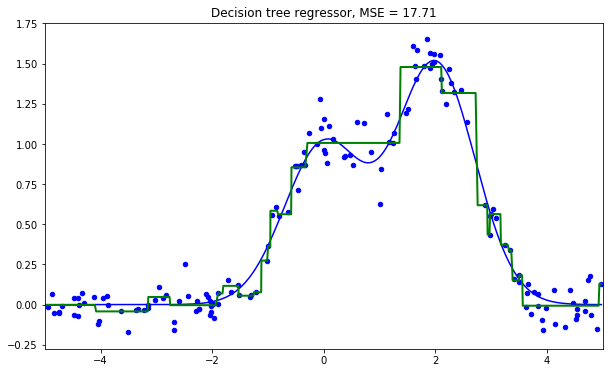

In [6]:
#графоне строим
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
#plt.scatter(X_test, y_test, c="r", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)   #зеленое - регрессия 
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
#mean squared error (MSE) or mean squared deviation (MSD)
plt.show()

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(reg_tree, feature_names=['x'], 
out_file= r'..\regres_tree.dot', filled=True)

Дерево решений аппроксимирует зависимость в данных кусочно-постоянной функцией. А ветвление идет по принципу: больше/меньше x $\implies$ прямая y = num 

## kNN (k Nearest Neighbors)

**k Nearest Neighbors (kNN)** - "ленивый" метод: т.е. у него отсутствует этап обучения. Когда ставится задача классифицировать (регрессировать) новый объект, то он сравнивается по определенной метрике с обучающей выборкой. Так каждый новый объект сравнивается заново.   
Операции выполняемые в kNN:   
1. Вычисляется расстояние до каждого из объектов обучающей выборки
2. Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
3. Для классификации:
    - Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди ближайших соседей
   Для регрессии:
    - Возвращается среднее (или медианное) значение целевого признака среди соседей.
    
    
*Из классической книги "The Elements of Statistical Learning": kNN теоретически идеальный алгоритмом, применимость которого просто ограничена вычислительными возможностями и проклятием размерностей.*

---

Применение:
- В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;
- В соревнованиях Kaggle kNN часто используется для построения мета-признаков (прогноз kNN подается на вход прочим моделям) или в стекинге/блендинге;
- В рекомендательных системах простым начальным решением может быть рекомендация какого-то товара (или услуги), популярного среди ближайших соседей человека, которому хотим сделать рекомендацию;

### Класс `sklearn.neighbors.KNeighborsClassifier:`

`KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)`

- **weights** (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос"): "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция  

- **algorithm** (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.   

- **leaf_size** (опционально): порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей  

- **metric**: "minkowski", "manhattan", "euclidean", "chebyshev" и другие. (При использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100)

## Пример анализа с kNN и Decision Tree
**На примере сета звонков**   
$X$ - признаки  
$y$ - labels, соответствующие этим признакам  

In [10]:
#C:\Users\Vlad\Documents\2019year\JupyterStash\ODS_mlcourse\github_ODS\data
df = pd.read_csv(r'C:\Users\Vlad\Documents\2019year\JupyterStash\ODS_mlcourse\github_ODS\data\telecom_churn.csv')

*Вспомогательный код*  
___
How to use `pd.factorize`:   
- It assigns labels to values in provided array (Series)
- Returns: (array of labels, idex(original array)
- Label 0 is assigned to 1st value in index array

In [17]:
print(df['International plan'].head(), '\n\n')
#pd.factorize
print(pd.factorize(df['International plan']), '\n\n')
print('Returns label array: ', pd.factorize(df['International plan'])[0], '\n')
print('Returns original array (idex): ',pd.factorize(df['International plan'])[1])

0     No
1     No
2     No
3    Yes
4    Yes
Name: International plan, dtype: object 


(array([0, 0, 0, ..., 0, 1, 0], dtype=int32), Index(['No', 'Yes'], dtype='object')) 


Returns label array:  [0 0 0 ... 0 1 0] 

Returns original array (idex):  Index(['No', 'Yes'], dtype='object')


Т.е. labels = 0 (для No) и 1 (для Yes) (`pd.factorize(df['International plan'])[0]`)

In [18]:
# ff.factorize()
ff = pd.Series(['Yes', 'Yes', 'No'])
print(ff)
print('Label 0 is assigned to 1st value in index array: ',ff.factorize())

0    Yes
1    Yes
2     No
dtype: object
Label 0 is assigned to 1st value in index array:  (array([0, 0, 1], dtype=int32), Index(['Yes', 'No'], dtype='object'))


*конец*

---

Сначала пробуем обучить без признака *State*. *Churn* - искомый признак

In [11]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
states = df['State']
y = df['Churn']
df.drop(['State', 'Churn'], axis=1, inplace=True)

Выделим 70% выборки (`X_train`, `y_train`) под обучение и 30% будут отложенной выборкой (`X_holdout`, `y_holdout`). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели. Обучим 2 модели – дерево решений и kNN, пока не знаем, какие параметры хороши, поэтому наугад: глубину дерева берем 5, число ближайших соседей – 10.

In [13]:
df.values

array([[128.  , 415.  ,   0.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  , 415.  ,   0.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  , 415.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 28.  , 510.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
       [184.  , 510.  ,   1.  , ...,  10.  ,   1.35,   2.  ],
       [ 74.  , 415.  ,   0.  , ...,   4.  ,   3.7 ,   0.  ]])

#### Валидация: отложенная выборка
- искусственно ограничиваем глубину и число соседий. Глубину и кол-во соседий беркем наугад

In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

Качество прогнозов будем проверять с помощью простой метрики – доли правильных ответов. Сделаем прогнозы для отложенной выборки. Дерево решений справилось лучше: доля правильных ответов около 94% против 88% у kNN.

In [17]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)    #Скармливаем основные признакие (тестовые), получаем предсказанный Churn 
accuracy_score(y_holdout, tree_pred)   #Сравниваем Churn из y_holdout (известное/тестовая выборка) и из предсказания

0.94

In [18]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.881

___
`GridSearchCV()` - class sklearn.model_selection.GridSearchCV()   
Exhaustive search over specified parameter values for an estimator. Т.е. буртфорсом перебирает гипер-параметры и выдвет те, у которых лучше всего предсказание. Гиперпараметры:
- Для деревьев - глубина дерева, количество признаков
- У kNN - кол-во соседей

#### Валидация: кросс-валидация
`GridSearchCV`
- неограничиваем глубину и кол-во основных признаков 

Теперь настроим параметры дерева на кросс-валидации. Настраивать будем максимальную глубину и максимальное используемое на каждом разбиении число признаков. Суть того, как работает GridSearchCV: для каждой уникальной пары значений параметров max_depth и max_features будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.   (CV - cross-validation)

**Cross-validation для Decision tree** 

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [20]:
tree_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

In [21]:
#cv = 5 - это 5-кратная кросс-валидация
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [36]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:   12.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 19)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [37]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [39]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.946

**Cross-validation для kNN** 

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

In [26]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

In [27]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    6.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [28]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 7}, 0.8859837119588513)

In [46]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

В этом примере дерево показало себя лучше, чем метод ближайших соседей: 94.2% правильных ответов на кросс-валидации и 94.6% на отложенной выборке против 88.6% / 89% для kNN.   

--- 

## Пример MNIST

`load_digits(n_class=10, return_X_y=False)` - Each datapoint is a 8x8 image of a digit. Значения - это интенсивности белого цвета для каждого пикселя.   
Датасет содержит 1797 картинок,	~180 для каждый из цифр.   
- (data, target) : tuple if `return_X_y` is True   

В этом случаи получается, что тут 64 признака.

In [30]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

---

In [61]:
print(X.shape, y.shape)

(1797, 64) (1797,)


`X, y = data.data, data.target` - возвращает X - матрица, где 1797 цифр (каждая представлена одной строкой с 64 значениями интенсивности). y - 1797 цифр соответствующих числам в X (т.е. это labels)

In [66]:
data.data[50] #строка с 64 пикселями

array([ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8.,
       14.,  4.,  0.,  0.,  0.,  6.,  2.,  3., 13.,  1.,  0.,  0.,  0.,
        0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,
        0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16.,
       11.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.])

In [65]:
print(X,'\n\n', y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 

 [0 1 2 ... 8 9 8]


---

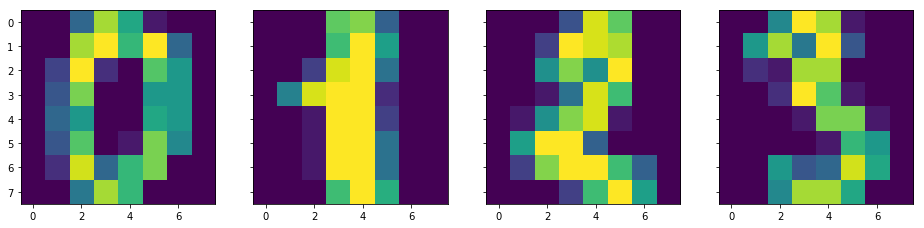

In [32]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X[i,:].reshape([8,8]));

In [33]:
#отложенная выборка
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)

In [34]:
#обучим DT и kNN, используя случайно выбранные параметры
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [35]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.9740740740740741, 0.6666666666666666)

Просто наугад дерево оч плохо все сделало, а kNN оч хорошо.

In [36]:
#кросс-валидация для дерева 
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:   11.8s finished
C:\Users\Vlad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64], 'max_features': [1, 2, 3, 5, 10, 20, 30, 50, 64]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [37]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 20, 'max_features': 64}, 0.8440731901352426)

С оптимизированными параметрами намного лучше, чем было. Но все равно намного хуже, чем kNN

In [38]:
#cross-validation for kNN (тут 1 ближайший сосед)
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5)) 

0.9865458422397149